# HDB Resale Flat Prices

## The objective of this project is to understand the key factors affecting HDB resale prices

### HDBs are Singapore's public apartments and the factors that affect prices are: which town is the flat located, the flat type and model, the storey range and floor area of the flat, and the flat's remaining lease

In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = "D:\Coursera\IBM Machine Learning\HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = pd.read_csv(filepath)

# Make a copy of the data
df = data.copy()

In [4]:
# Preview
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
# Number of rows
print(df.shape[0])

# Column names
print(df.columns.tolist())

# Data types
print(df.dtypes)

# Check for null values
print(df.isnull().sum())

80374
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


In [6]:
# Format the month column to datetime
df['month'] =  pd.to_datetime(df['month'],
                              format='%Y-%m')

In [7]:
# Select columns of 'object' data type
df_object = df.select_dtypes(include=['object'])
df_object.head()

,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,Improved,61 years 04 months
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,New Generation,60 years 07 months
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,New Generation,62 years 05 months
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,New Generation,62 years 01 month
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,New Generation,62 years 05 months


In [8]:
# Count the number of values
print(df_object['block'].value_counts().count())
print(df_object['street_name'].value_counts().count())
print(df_object['remaining_lease'].value_counts().count())

2446
548
623


In [9]:
# Removing columns with too many distinct values 
df1 = df.drop(columns = ['block', 'street_name', 'remaining_lease'])
df1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0


In [10]:
# See the number of resale flats sold for each town
print(df1['town'].value_counts())

SENGKANG           6408
WOODLANDS          6019
JURONG WEST        5984
YISHUN             5641
TAMPINES           5235
PUNGGOL            5119
BEDOK              4356
HOUGANG            3848
ANG MO KIO         3613
CHOA CHU KANG      3333
BUKIT PANJANG      3197
BUKIT MERAH        3097
BUKIT BATOK        2953
TOA PAYOH          2646
PASIR RIS          2421
KALLANG/WHAMPOA    2275
QUEENSTOWN         2140
SEMBAWANG          2104
GEYLANG            1928
JURONG EAST        1793
CLEMENTI           1785
SERANGOON          1601
BISHAN             1535
CENTRAL AREA        658
MARINE PARADE       465
BUKIT TIMAH         220
Name: town, dtype: int64


Resale flats in Sengkang were sold the most number of times, followed by Woodlands then Jurong West

In [11]:
# Create a new feature to calculate the resale price per square meter
df1["resale_price_per_sqm"] = round ((df1["resale_price"] / df1["floor_area_sqm"]))
df1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_price_per_sqm
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,5273.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,3731.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,3910.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,3897.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,3955.0


In [12]:
# Create a new feature to calculate the estimated remaining lease years of the flats
est_remaining_lease_yrs = 99 - (2020 - df1["lease_commence_date"])
df1.insert(6, "est_remaining_lease_yrs", est_remaining_lease_yrs)
df1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,est_remaining_lease_yrs,lease_commence_date,resale_price,resale_price_per_sqm
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,58,1979,232000.0,5273.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,57,1978,250000.0,3731.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,1980,262000.0,3910.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,59,1980,265000.0,3897.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,1980,265000.0,3955.0


In [13]:
# Removing lease commence date column 
df2 = df1.drop(columns = ['lease_commence_date'])
df2.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,est_remaining_lease_yrs,resale_price,resale_price_per_sqm
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,58,232000.0,5273.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,57,250000.0,3731.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,262000.0,3910.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,59,265000.0,3897.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,265000.0,3955.0


In [14]:
# Basic statistical details of the final features
round(df2.describe())

,floor_area_sqm,est_remaining_lease_yrs,resale_price,resale_price_per_sqm
count,80374.0,80374.0,80374.0,80374.0
mean,98.0,73.0,439316.0,4532.0
std,24.0,13.0,153390.0,1214.0
min,31.0,45.0,140000.0,2090.0
25%,82.0,63.0,330000.0,3731.0
50%,95.0,73.0,410000.0,4231.0
75%,113.0,82.0,515000.0,4931.0
max,249.0,98.0,1258000.0,12762.0


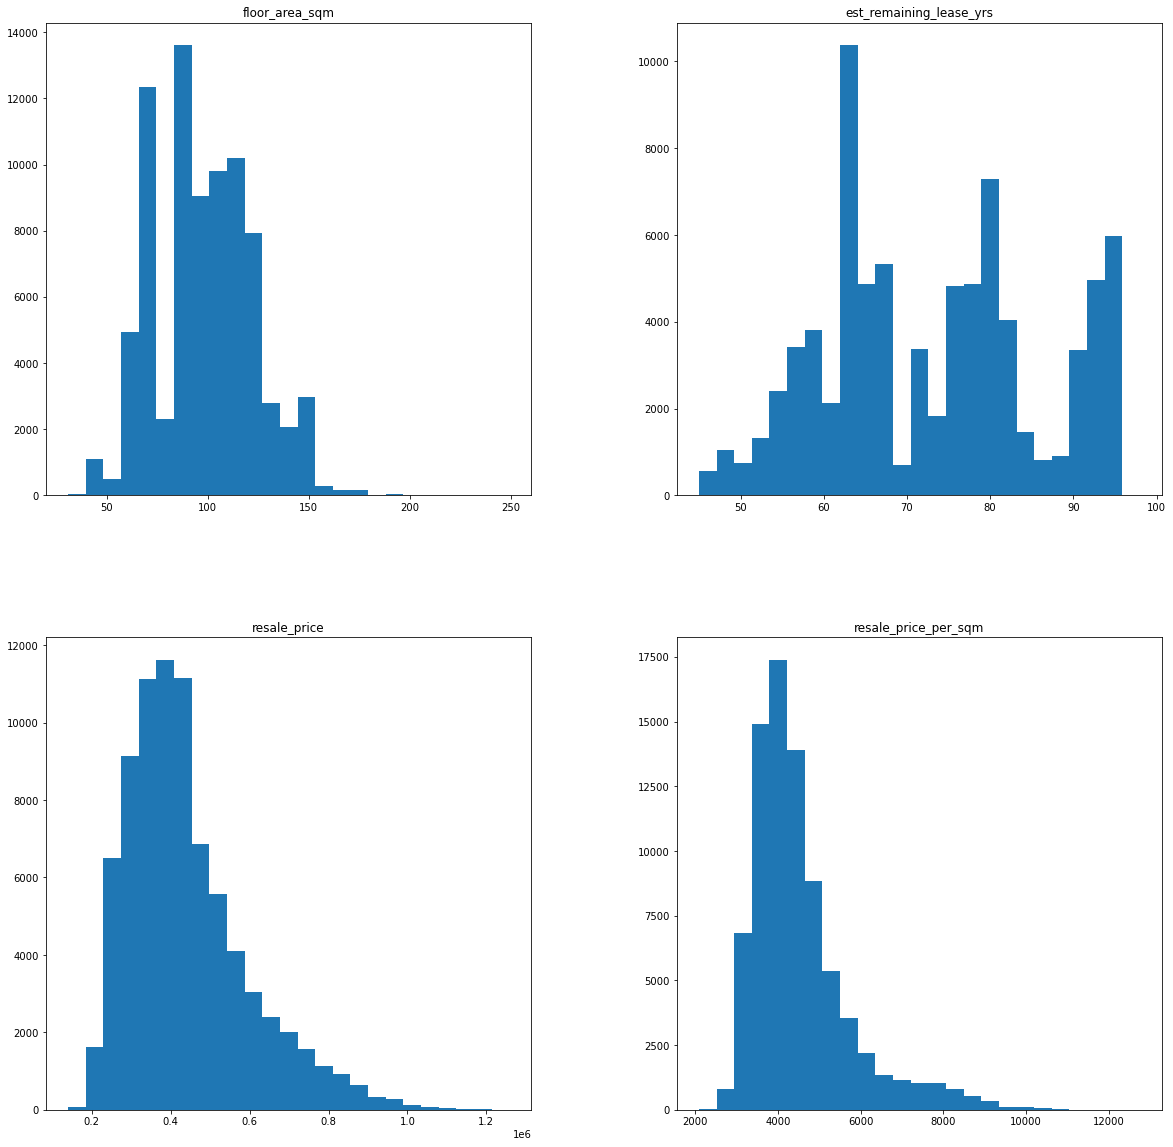

In [15]:
# Visualizing the distribution of numerical features
axList = df2.hist(bins=25, grid=False, figsize=(20,20))

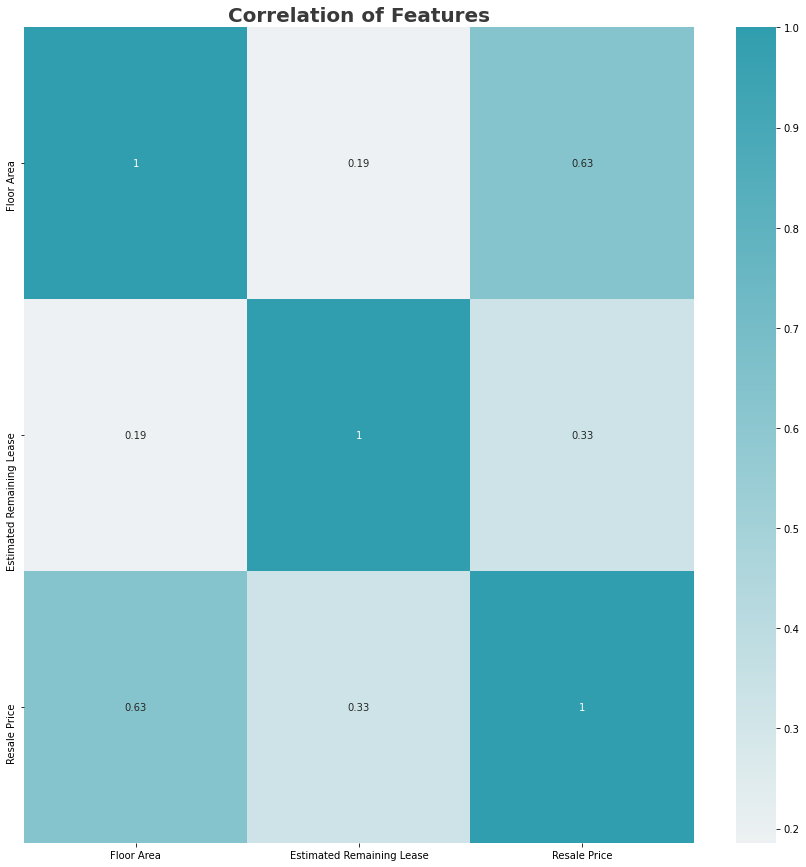

In [16]:
# Visualizing the correlation of 2 key features to resale price
features = df2[['floor_area_sqm', 'est_remaining_lease_yrs', 'resale_price']]
plt.figure(figsize = (15,15))
sns.heatmap(features.corr(), annot = True,
            cmap=sns.light_palette((210, 90, 60), input="husl", as_cmap = True))
ax = plt.gca()
ax.title.set_color('#3a3a3a')
ax.set_xticklabels(['Floor Area', 'Estimated Remaining Lease', 'Resale Price'])
ax.set_yticklabels(['Floor Area', 'Estimated Remaining Lease', 'Resale Price'])
plt.title('Correlation of Features', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.show()

Both features have positive correlations but floor area has a stronger correlation to resale price 

In [16]:
# Export preprocessed data
compression_opts = dict(method='zip',
                        archive_name='HDB_Resale_Flat_Prices_Preprocessed.csv')  
df2.to_csv('HDB_Resale_Flat_Prices_Preprocessed.zip', index=False,
             compression=compression_opts)